<a href="https://colab.research.google.com/github/kejerial/pairs-trading-algorithm/blob/main/Pairs_Trading_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 874.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=6d254cd0f7b3b791f7c729a6388d7b8042f07bd2c43ddb1385ad126816e65322
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import coint
import seaborn as sn
from datetime import datetime
np.random.seed(1)

In [6]:
yf.pdr_override()
startDate = datetime(2020, 12, 1)
endDate = datetime(2022, 12, 1)

def get_historical_data(tickers):
  data = pd.DataFrame()
  names = list()
  for ticker in tickers:
    data = pd.concat([data, pd.DataFrame(yf.download(ticker, start=startDate, end=endDate).iloc[:,4])], axis = 1)
    names.append(ticker)
  data.columns = names
  return data

# A group of tech companies with largest market cap traded on US Stock Exchange
tickers = ["MSFT", "AAPL", "NVDA", "GOOG", "AMZN", "TSM", "AVGO",
           "ASML", "ORCL", "TCEHY", "CRM", "AMD", "NFLX", "SAP",
           "ADBE", "CSCO", "QCOM", "INTU", "INTC", "IBM", "AMAT"]

data = get_historical_data(tickers)
data = data.interpolate(method='linear')
data = data.bfill(axis=0)
print('\n')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******



(504, 21)


,MSFT,AAPL,NVDA,GOOG,AMZN,TSM,AVGO,ASML,ORCL,TCEHY,...,AMD,NFLX,SAP,ADBE,CSCO,QCOM,INTU,INTC,IBM,AMAT
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,210.166687,120.436584,133.553162,89.904999,161.003998,94.542305,367.479980,436.006500,55.794926,69.808022,...,92.629997,504.579987,115.657143,479.149994,39.165348,140.273331,349.639740,45.270847,100.833603,82.006065
2020-12-02,209.350143,120.789894,135.094162,91.397499,160.176498,93.304993,366.716980,437.714569,56.117867,69.714447,...,93.739998,503.380005,115.168274,481.260010,39.480167,139.686569,348.336395,45.581421,102.028915,82.998672
2020-12-03,208.251755,120.652481,133.652496,91.338501,159.336502,93.267494,363.147217,439.558624,56.298347,71.539185,...,92.309998,497.519989,115.083672,484.279999,39.678074,139.621353,356.381165,46.577087,101.202011,83.786919
2020-12-04,208.368362,119.975327,135.271255,91.399498,158.128998,97.232544,373.938171,450.710205,56.953743,70.865433,...,94.040001,498.309998,117.180199,486.000000,39.920948,146.802170,361.182587,47.490540,104.141228,86.453293
2020-12-07,208.300354,121.447411,135.755112,90.973999,157.899994,99.725922,382.303802,455.892883,56.801777,70.959015,...,94.070000,515.780029,115.845184,492.250000,39.893955,147.174774,364.700348,45.855457,102.094414,86.745262


In [7]:
corr_matrix = data.corr()
corr_matrix

,MSFT,AAPL,NVDA,GOOG,AMZN,TSM,AVGO,ASML,ORCL,TCEHY,...,AMD,NFLX,SAP,ADBE,CSCO,QCOM,INTU,INTC,IBM,AMAT
MSFT,1.000000,0.752705,0.943815,0.936855,0.393558,0.332098,0.740912,0.780967,0.844953,-0.205388,...,0.843150,0.295814,0.348301,0.592686,0.820188,0.609464,0.914299,0.128576,0.145034,0.748067
AAPL,0.752705,1.000000,0.708189,0.575697,-0.029730,-0.068014,0.873619,0.303457,0.512095,-0.568811,...,0.588498,-0.193049,-0.171983,0.054268,0.497903,0.581186,0.592381,-0.322307,0.304318,0.314296
NVDA,0.943815,0.708189,1.000000,0.883839,0.445761,0.426302,0.742778,0.772119,0.775674,-0.107529,...,0.916560,0.379573,0.405174,0.607270,0.826860,0.727251,0.891528,0.203786,0.036628,0.780661
GOOG,0.936855,0.575697,0.883839,1.000000,0.549594,0.472022,0.574587,0.870815,0.862713,-0.022729,...,0.764490,0.420676,0.520992,0.713649,0.887361,0.509586,0.893846,0.325729,0.127194,0.839731
AMZN,0.393558,-0.029730,0.445761,0.549594,1.000000,0.851715,-0.080058,0.692475,0.402480,0.695644,...,0.529633,0.866816,0.834440,0.856336,0.595956,0.455503,0.555263,0.798230,-0.512181,0.688936
TSM,0.332098,-0.068014,0.426302,0.472022,0.851715,1.000000,0.014486,0.654761,0.278753,0.807890,...,0.558576,0.810671,0.824301,0.772908,0.585271,0.559046,0.448616,0.899953,-0.471375,0.737384
AVGO,0.740912,0.873619,0.742778,0.574587,-0.080058,0.014486,1.000000,0.322582,0.465621,-0.469868,...,0.628404,-0.202435,-0.161802,0.020327,0.529625,0.571797,0.508223,-0.167620,0.328879,0.427453
ASML,0.780967,0.303457,0.772119,0.870815,0.692475,0.654761,0.322582,1.000000,0.846610,0.239193,...,0.717752,0.696890,0.796624,0.876726,0.886465,0.444532,0.856642,0.527262,-0.008492,0.908494
ORCL,0.844953,0.512095,0.775674,0.862713,0.402480,0.278753,0.465621,0.846610,1.000000,-0.160801,...,0.628844,0.416928,0.525697,0.650907,0.829939,0.316882,0.869101,0.154152,0.290403,0.747170
TCEHY,-0.205388,-0.568811,-0.107529,-0.022729,0.695644,0.807890,-0.469868,0.239193,-0.160801,1.000000,...,0.077133,0.716876,0.674097,0.508222,0.110068,0.159329,-0.034716,0.869512,-0.606772,0.327854


<Axes: >

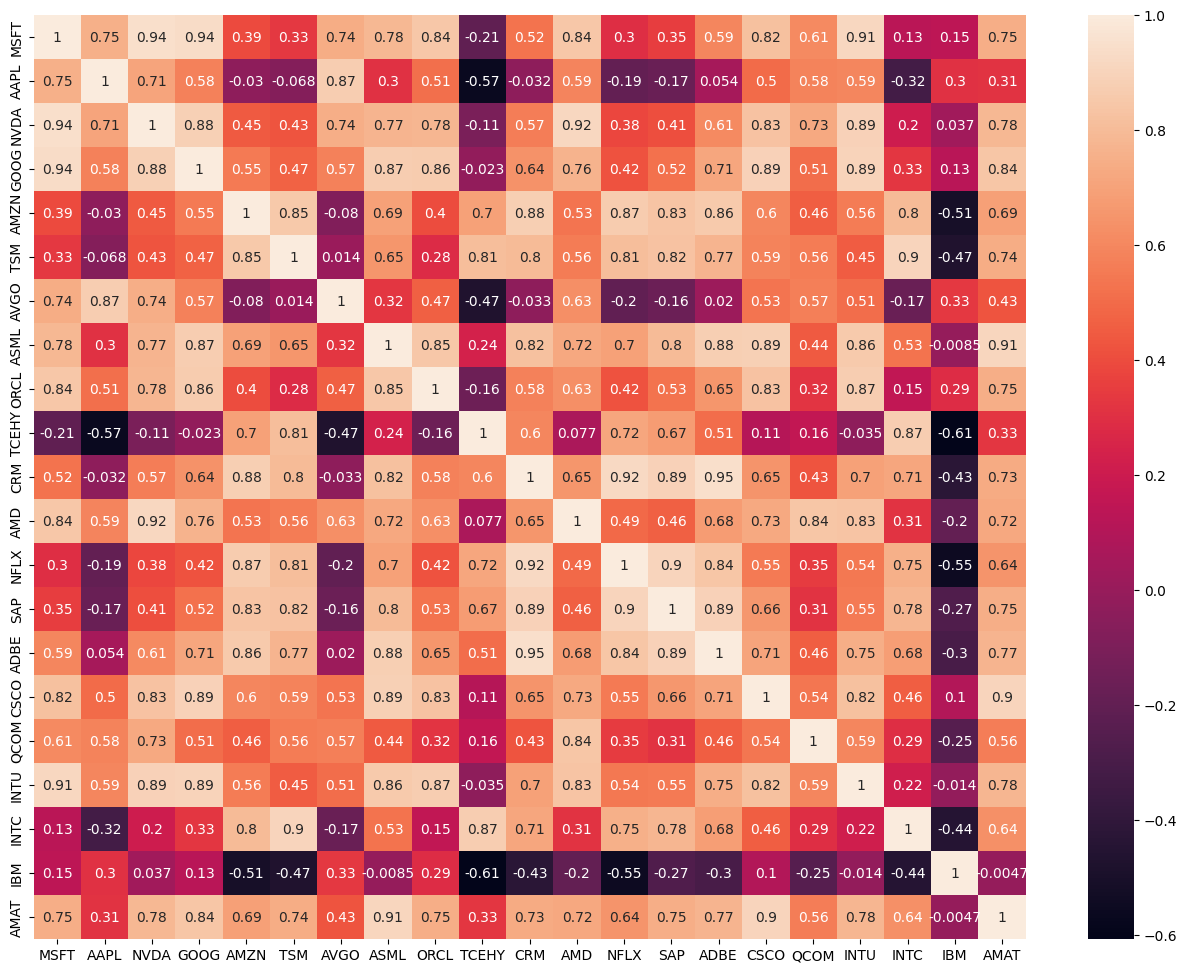

In [8]:
plt.figure(figsize=(16, 12), dpi=100)
sn.heatmap(corr_matrix, annot = True)

Financial variables are typically known to be non-stationary, which means that the time series data has properties that change over time. This makes things difficult, because pairs trading relies on the idea of the mean reversion (that two assets will revert back to their long term average over time). So, we want to find pairs that are **cointegrated**. Cointegration refers to when we have two time series data that are respectively non-stationary, but some linear combination of the two is.

To look for cointegrated pairs, we will utilize the Engle-Granger Two-Step Cointegration test. This is broken down into by creating residuals by regressing one variable on the other and then applying the Augmented Dickey-Fuller test to test for stationarity on the residual.

In [9]:
from statsmodels.tsa.stattools import adfuller, coint
import statsmodels.api as sm
from itertools import combinations

def engle_granger(stock1, stock2):
  stock1 = sm.add_constant(stock1)
  model = sm.OLS(stock2, stock1).fit()
  residuals = model.resid
  adf_test = adfuller(residuals)

  return adf_test[1] # Returns p-value

stock_pairs = combinations(data.columns, 2)

p_values = {}

for pair in stock_pairs:
    stock1, stock2 = pair
    p_value = engle_granger(data[stock1], data[stock2])
    p_values[pair] = p_value


Note that due to running many cointegration tests, we are liable to the multiple comparison bias which refers to when we get falsely many statistically significant p-values because of the sheer large number of tests we run. To counteract this, I utilized the Benjamini-Hochberg (BH) Procedure which is commonly used to reduce Type I Errors.

The BH Procedure roughly works as follows:
1. Puts p-values in order and ranks according (ie: smallest has rank 1, next smallest has rank 2, and so on)
2. Calculates each p-value's Benjamini-Hochberg critical value using (i/m)Q where i = p-value rank, m = total number of values, and Q = chosen false discovery rate
3. Find largest p-values that are less than its BH critical value



In [10]:
df = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-Value']).reset_index()
df[['Stock 1', 'Stock 2']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df.drop(columns=['index'], inplace=True)
df = df[['Stock 1', 'Stock 2', 'P-Value']]
df = df[df['P-Value'] < 0.05]

# BH Procedure
df = df.sort_values('P-Value', ascending=False)
df['Rank'] = range(1, len(df) + 1)
fdr = .10
df['BH Crit Value'] = df.apply(lambda row: (row['Rank']/len(df))*fdr, axis=1)
df = df[df['BH Crit Value'] > df['P-Value']]
df.head()

,Stock 1,Stock 2,P-Value,Rank,BH Crit Value
188,SAP,AMAT,0.033941,7,0.038889
68,GOOG,CSCO,0.032063,8,0.044444
24,AAPL,AVGO,0.030562,9,0.050000
164,CRM,AMAT,0.028802,10,0.055556
194,ADBE,AMAT,0.028181,11,0.061111


Now we have the pairs with the highest p-values that are less than its BH critical value! Let's take a look at 'SAP' and 'AMAT' (Applied Materials) as it's p-value is the largest.




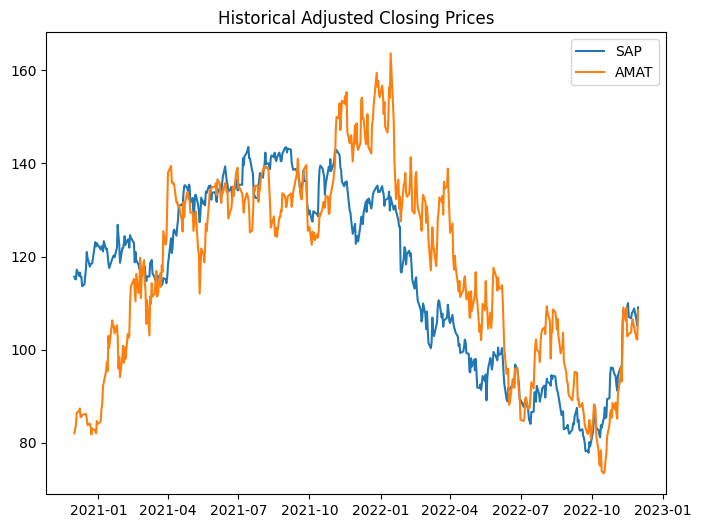

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
SAP = data['SAP']
AMAT = data['AMAT']
plt.plot(SAP, label = "SAP")
plt.plot(AMAT, label = "AMAT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Now, we plot the spread between the prices.

Text(0.5, 1.0, 'Spread between SAP and AMAT')

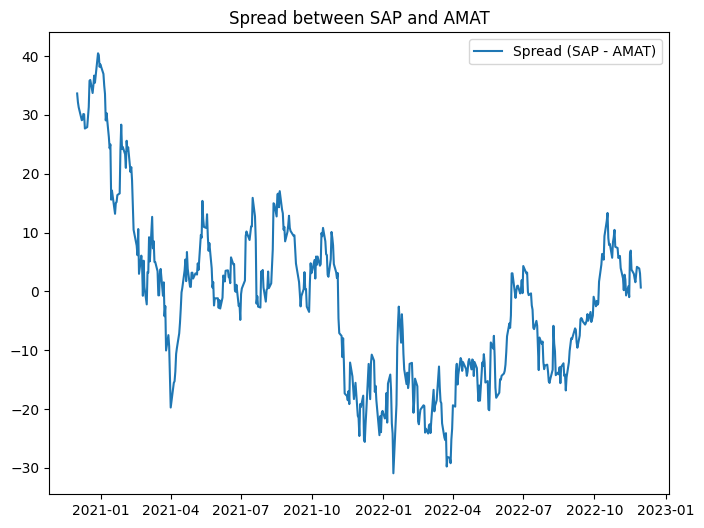

In [12]:
figure(figsize=(8, 6), dpi=100)
plt.plot(SAP - AMAT, label = 'Spread (SAP - AMAT)')
plt.legend()
plt.title("Spread between SAP and AMAT")

Also, let's try plotting the ratio.

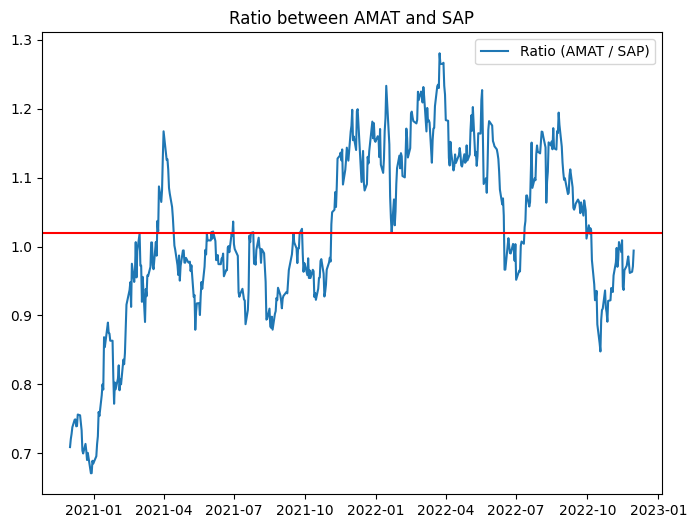

In [13]:
figure(figsize=(8, 6), dpi=100)
ratio = AMAT / SAP
plt.plot(ratio, label = 'Ratio (AMAT / SAP)')
plt.legend()
plt.title("Ratio between AMAT and SAP")
plt.axhline(ratio.mean(), color='red')

We can see that the ratio between the prices of AMAT and SAP reasonably deviate around the mean. Let's first normalize the price ratio values and plot standard deviation lines.


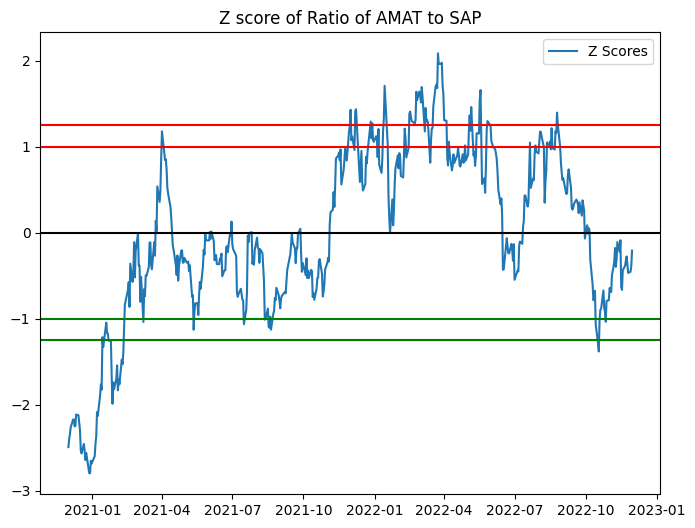

In [14]:
figure(figsize=(8, 6), dpi=100)
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red')
plt.axhline(1.25, color='red')
plt.axhline(-1.0, color='green')
plt.axhline(-1.25, color='green')
plt.legend(loc = 'best')
plt.title('Z score of Ratio of AMAT to SAP')
plt.show()

But, how do we know when to buy and sell?


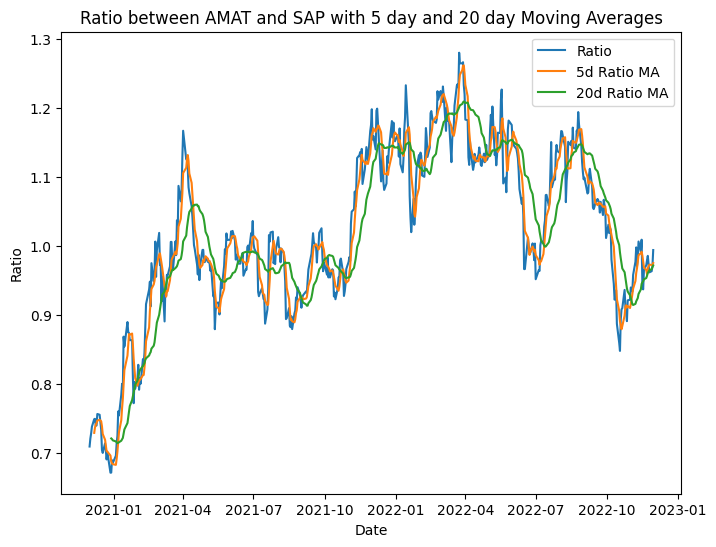

In [15]:
figure(figsize=(8, 6), dpi=100)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between AMAT and SAP with 5 day and 20 day Moving Averages')
plt.show()

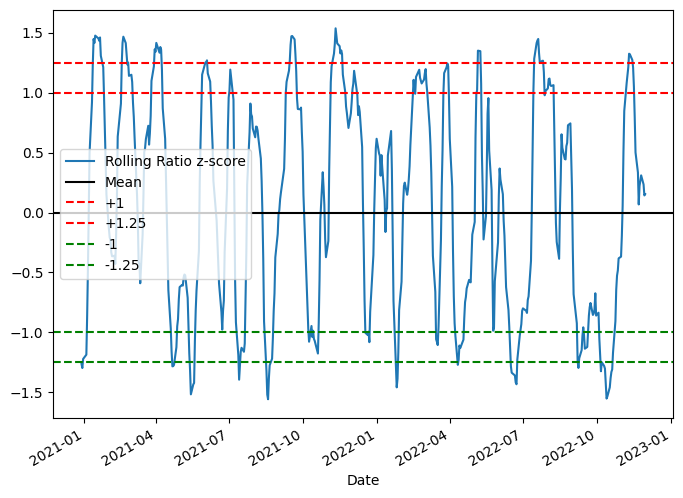

In [16]:
figure(figsize=(8, 6), dpi=100)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

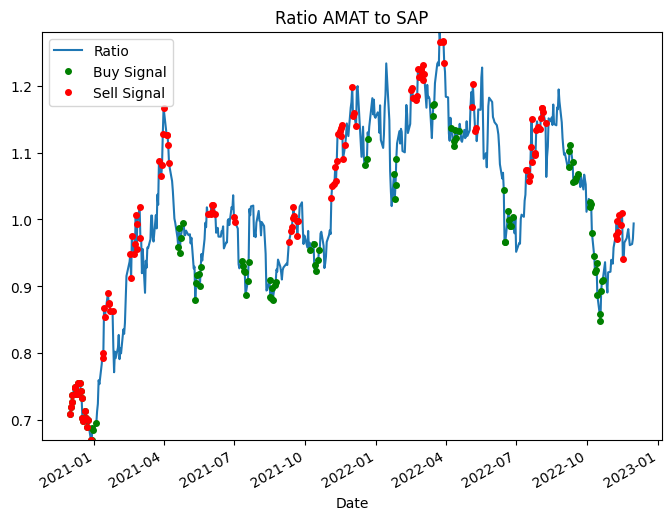

In [17]:
figure(figsize=(8, 6), dpi=100)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='o', markersize=4)
sell.plot(color='r', linestyle='None', marker='o', markersize=4)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Ratio AMAT to SAP')
plt.show()

In [47]:
def implement_strategy(data, lookback, width, stock1, stock2, s1_pos, s2_pos):
  #calculating our 63-day hedge ratio lookback window like this makes our program more flexible and readable
  hr_lookback_months = 3
  monthly_trading_days = 21
  hr_lookback = monthly_trading_days * hr_lookback_months

  df = data.copy()
  df['hedge_ratio'] = df[stock1].rolling(hr_lookback).corr(df[stock2]) * df[stock1].rolling(hr_lookback).std() / df[stock2].rolling(hr_lookback).std()
  df['spread'] = df[stock1] - df['hedge_ratio'] * df[stock2]

  #BB calculations
  df['rolling_spread'] = df['spread'].rolling(lookback).mean()
  df['rolling_spread_std'] = df['spread'].rolling(lookback).std()
  df['rolling_z_score'] = (df['spread'] - df['rolling_spread'])

  df['upper_band'] = df['rolling_spread'] + (width * df['rolling_spread_std'])
  df['lower_band'] = df['rolling_spread'] - (width * df['rolling_spread_std'])


  s1_pnl = f'P&L {stock1}'
  s2_pnl = f'P&L {stock2}'

  df[s1_pos] = 0
  df[s2_pos] = 0
  df[s1_pnl] = 0
  df[s2_pnl] = 0

  money = 0
  countS1 = 0
  countS2 = 0
  signal = False
  trades = 0
  c1_pos = 0
  c2_pos = 0
  c_hedge = 0
  trade = False
  trades = 0
  p1 = 0
  p2 = 0


  for date, row in df.iterrows():
    # Sell short if the z-score is > 1
    trade = False
    if row['rolling_z_score'] > width:
      if not signal:
        c1_pos = -1
        c_hedge = row['hedge_ratio']
        c2_pos = -c1_pos * c_hedge
        df.loc[date,s1_pos] = c1_pos
        df.loc[date,s2_pos] = c2_pos
        p1 = row[stock1]
        p2 = row[stock2]
        signal = True
        trade = True
      else:
        df.loc[date,s1_pos] = c1_pos
        df.loc[date,s2_pos] = c2_pos
    # Buy long if the z-score is < 1
    elif row['rolling_z_score'] < -width:
      if not signal:
        c1_pos = 1
        c_hedge = row['hedge_ratio']
        c2_pos = -c1_pos * c_hedge
        df.loc[date,s1_pos] = c1_pos
        df.loc[date,s2_pos] = c2_pos
        p1 = row[stock1]
        p2 = row[stock2]
        signal = True
        trade = True
      else:
        df.loc[date,s1_pos] = c1_pos
        df.loc[date,s2_pos] = c2_pos
    # Clear positions if the z-score between -.5 and .5
    if abs(row['rolling_z_score']) < (width+1)/4 or abs(row['rolling_z_score']) > width * 1.5:
      if signal:
        c1_pos = -c1_pos
        c2_pos = -c2_pos
        df.loc[date,s1_pos] = 0
        df.loc[date,s2_pos] = 0
        signal = False
        trade = True

    if trade:
      trades +=1
      df.loc[date,s1_pnl] = c1_pos * (row[stock1] - p1)
      df.loc[date,s2_pnl] = c2_pos * (row[stock2] - p2)

  df['P&L'] = df[s1_pnl] + df[s2_pnl]
  return df

In [48]:
stock1 = 'AMAT'
stock2 = 'SAP'
s1_pos = f'Position {stock1}'
s2_pos = f'Position {stock2}'
dates = pd.date_range(start='2020-12-01', end='2022-12-01', freq='B')
total_data = pd.DataFrame(index=dates, data={'AMAT': AMAT, 'SAP': SAP})
total_data.dropna(inplace=True)
total_data.head()

standard_BB_train_df = implement_strategy(total_data, 42, 2.236, stock1, stock2, s1_pos, s2_pos)
standard_BB_train_df['P&L'].value_counts()
standard_BB_train_df['P&L'].sum()

3.7218274836429783

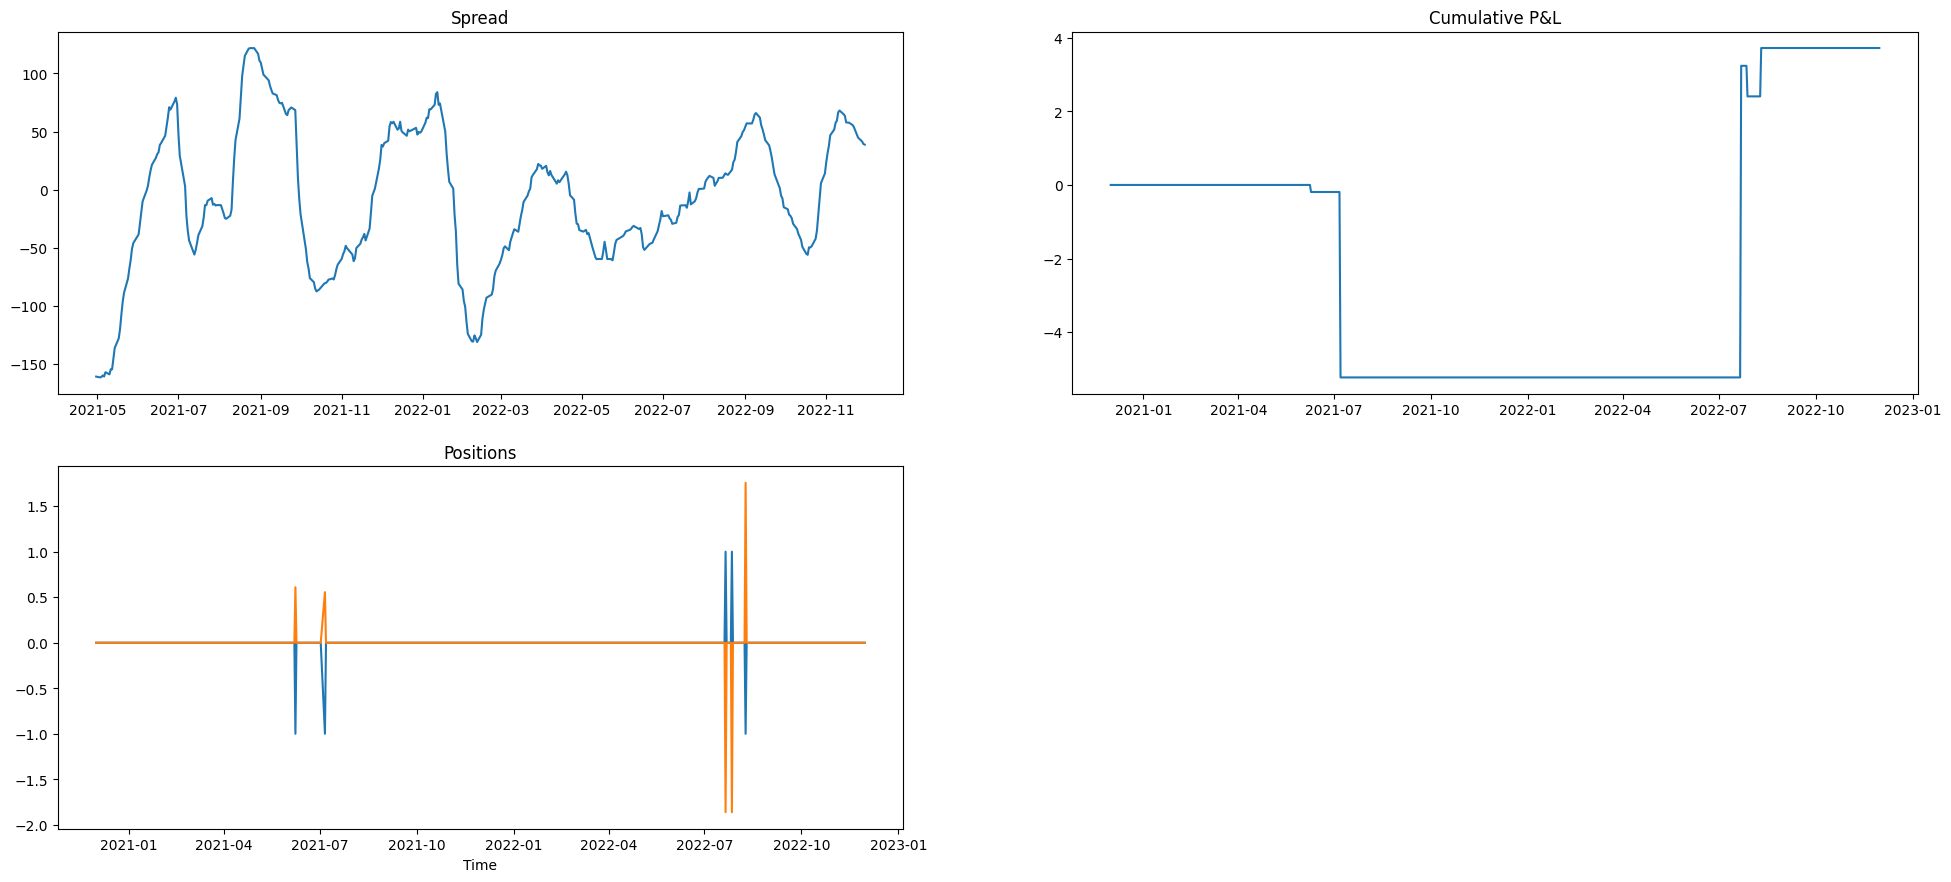

In [46]:
fig = plt.figure(figsize=(24,16))
ax2 = fig.add_subplot(321)
ax3 = fig.add_subplot(322)
ax4 = fig.add_subplot(323)

ax2.plot(standard_BB_train_df['rolling_z_score'])
ax2.set_title("Spread")

ax3.plot(standard_BB_train_df['P&L'].cumsum())
ax3.set_title("Cumulative P&L")

ax4.plot(standard_BB_train_df[f'Position {stock1}'], label = "AMAT")
ax4.plot(standard_BB_train_df[f'Position {stock2}'], label = "SAP")
ax4.set_title("Positions")

plt.xlabel("Time")
plt.show()